# Artificial Neural Network
### The Neuron 
![](https://drive.google.com/uc?id=1lylxXfs3DUnrkYvGRgetu3hKCtHfeAZG)
Neurons work together to perform complex tasks. A single neuron on its own is almost useless.  
* Dendrites - The information receiver.
* Axon - The information transporter.
* Synapse - Connection between axon and dendrites btwn 2 neurons.
### The Artificial Neuron
![](https://drive.google.com/uc?id=1hQkEXj7ELAZ217ZF_xzSn2BD99oIz0GD)
* Input Layer - analogous to our sensing organs (eyes, nose, skin, ears, taste etc) in combination with the synapses that transmit the senses info to the brain.
              - The input values are now the feature values (independent values) that we feed into the artificial neuron/neural network.
![](https://drive.google.com/uc?id=1GYpQbQ5jXF3dEvAOqBP2HpGnPb9tmxaY)      
* Synapses - We assign weights that ascribe varying strengths to various inputs to the neuron.
![](https://drive.google.com/uc?id=1Kk3YVjF4Np99gEvshg8lN3_Nno1Y5Vp7)
* Neuron  - analogous to the brain/section of brain that sums the weights of the inputs and applies an **activation function** to this weighted sum. Passes or does not pass on the activated weighted on to the next neuron depending on the value of the weighted sum.
### Activation Function
![](https://drive.google.com/uc?id=1ejK9IeiirJay4L0yMCYMF-u0Xsj2yUF_)
### The 4 Types of Activation Functions
1. **Threshold Function**
![](https://drive.google.com/uc?id=1Hy4a-8Ok7ZKgMtLWlJWf_5KGQVTKC51w)  

2. **Sigmoid Function**
![](https://drive.google.com/uc?id=1wXF7EaTBW9RPy0XhsYwbzAjvBCiu6mQ7)  

Unlike the thershold, it is a smooth function which provides useful features. It can provide the probabilities of binary variable (0 or 1). Typically applied to the **output layer** of the neural network.  

3. **Rectifier Function**
![](https://drive.google.com/uc?id=1YqL1u-P-l4znPjEJdui2fz47fwo9Cjnt)  

Is one of the most popular activation functions. Typically applied to the **hidden layers** of the neural network.  

4. **Hyperbolic Tangent Function (tanh)**
![](https://drive.google.com/uc?id=1hUBCXB75_B3L96VQzfaDx7fIl8tfYd2Z)  

Similar to the Rectifier function.  

## HOW DO NEURAL NETWORKS WORK ?
![](https://drive.google.com/uc?id=105l6mOmXMCK4IGhcaTfn-pBLh9SfndRN)  
They fundamentally operate in a similar fashion to regular ML models however, the magic comes with the **hidden layers** which provide the secret sauce that neural networks get their extra accuracy from.  
**The power of the interplay between the neurons for each of the feature variables creates the modelling complexity that enables high predictive accuracy.**
## HOW DO THEY LEARN ?
### The Perceptron
![](https://drive.google.com/uc?id=1JTpkq0uXCLEl2vi8p4-rxdTO-u5sGjLh) 
It is a recursive process of feed-forward data pushing through the NN followed by a feedback adjustemnt/update of the weights based on the error from the cost function.  

**Feed-Forward Propagation Process & Prediction**
![](https://drive.google.com/uc?id=1NMa6GCLVFCG6juMBIjqV3wH1lWPdFsyn)   
**Feedback & Weight Adjustment**  
![](https://drive.google.com/uc?id=144604dBycz8YYfFeqOY2-y8zNt8N3eme)  

The process of feedback adjustment of the weights of the NN model is called **BackPropagation.**

### Gradient-Descent
An efficient method of implementing BackPropagation.
Only applies to **convex cost functions** situations.  
Is susceptible to the **local minimum** problem.  
Performs the back-prop using the entire training set.  

![](https://drive.google.com/uc?id=1xh3AMqQhlLr70lxlfgVvtgy_uY2XcZKO) 
### Stochastic Gradient-Descent
Can be applied to **non-convex** cost function situations to ensure that a **global minimum** is found.
Performs the back-propagation with each observation/data row/ input.   
Is faster the the regular full-batch gradient descent.  

### Backpropagation
We can adjust each of the weights simultaneously which lets us know which weights we are adjusting and how the weight adjustment is affecting the NN model performance.  

## THE NN TRAINING PROCESS
![](https://drive.google.com/uc?id=1mpWj0CboHnDZ1fr0t5u7kgXDFEVjIG7l)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# The Objective
**Build a Geo-Demographic Segmentation Model for Bank Customers**  
Training a NN model to predict whether a customer is about to close their bank account or not based on various customer behaviours and financial data.  
Determine which customers are at the highest risk of leaving.  


### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [4]:
data = pd.read_csv('/content/drive/MyDrive/DeepLearning/ArtificialNeuralNetworks/data/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.shape

(10000, 14)

**We will need to standardize the data because of the massive variance in range of the feature values**

In [8]:
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

In [9]:
X[:5]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [10]:
y[:5]

array([1, 0, 1, 0, 0])

### Encoding categorical data

Label encoding the **`Gender`** column -> Contains categorical data

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [12]:
X[:5]

array([[619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 0, 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

One Hot Encoding the **`Geography`** column

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
X[:5]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

### Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train.shape

(8000, 12)

## Part 2 - Building the ANN

### Initializing the ANN

In [18]:

ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim = 12))

Units - describes the number of hidden neurons we want in that hidden layer

### Adding the second hidden layer

In [20]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim = 12))

### Adding the output layer

In [21]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

For the output layer ,we need:
1. To use the **sigmoid** activation function - since it is a binary class prediction.
2. 1 output neuron since we are prediciting a binary class ( 0 or 1) which can be handled by a single output neuron.   

We use the **softmax** when we have multi-class predictions.

## Part 3 - Training the ANN

### Compiling the ANN

In [22]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

1. The **`adam`** optimizer is a SGD based optimizer used to perform the backpropagation.  

For multi-class prediction/classification, we use the **`categorical_crossentropy`** loss function.

### Training the ANN on the Training set

In [23]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.6184 - accuracy: 0.6469
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.7977
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.7978
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.8015
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8012
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.8039
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8073
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.8048
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8141
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4121 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [24]:
ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5

array([[False]])

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [25]:
y_preds = ann.predict(X_test)
y_preds = (y_preds > 0.5)

## Simple Evaluation 
### Confusion Matrix & Accuracy Score

[[1510   85]
 [ 193  212]]


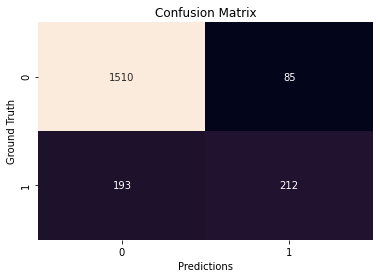

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_preds)
print(conf_mat)
sns.heatmap(conf_mat, annot = True, cbar = False, fmt = '0.6g')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()

In [27]:
accuracy_score(y_test, y_preds)

0.861

## Evaluation using cross validation

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [29]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Mean CV Accuracy: ", accuracies.mean()), print("Variance in CV Accuracies: ", accuracies.std())

Mean CV Accuracy:  0.8421249985694885
Variance in CV Accuracies:  0.020646202410985273


(None, None)

## Tuning the ANN's HyperParameters for better performance.
### Using GridSearchCV

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [31]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 250],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
256/256 [==============================] - 1s 1ms/step - loss: 0.6326 - accuracy: 0.7956
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8000
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.7993
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.7897
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.7952
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.7894
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8005
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.7950
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8104
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4238 - accura

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Streaming output truncated to the last 5000 lines.
Epoch 101/250
200/200 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8325
Epoch 102/250
200/200 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8316
Epoch 103/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8394
Epoch 104/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8428
Epoch 105/250
200/200 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8364
Epoch 106/250
200/200 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8266
Epoch 107/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8354
Epoch 108/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8395
Epoch 109/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8360
Epoch 110/250
200/200 

In [32]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [33]:
best_parameters

{'batch_size': 25, 'epochs': 100, 'optimizer': 'rmsprop'}

In [35]:
best_accuracy

0.850125